In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import optuna
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split

In [8]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [9]:
torch.cuda.is_available()

False

In [7]:
device

device(type='cpu')

In [8]:
df = pd.read_csv('dataset_phishing.csv')

In [73]:
df.head(20)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

<Axes: ylabel='count'>

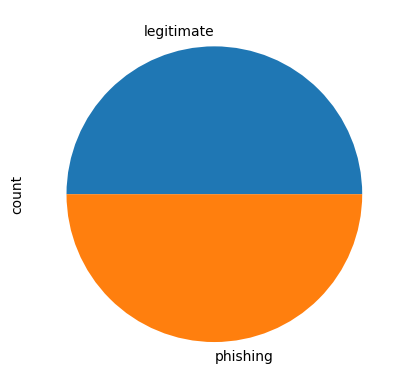

In [75]:
df['status'].value_counts().plot.pie()

In [76]:
df['status'] = df['status'].apply(lambda x:  0 if x  == 'legitimate' else 1 )

<Axes: ylabel='count'>

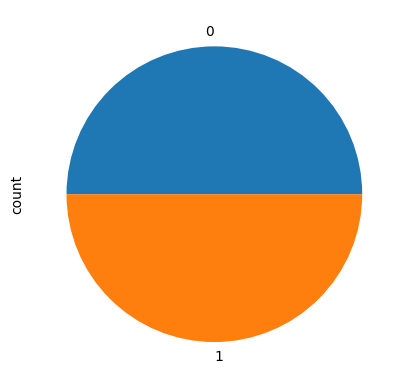

In [77]:
df['status'].value_counts().plot.pie()

In [78]:
df_feature = df.copy()

In [79]:
df_feature = df_feature.drop('url', axis = 1)

In [80]:
df_feature

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,0
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,1
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,0
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,0


In [81]:
X = df_feature.drop('status', axis=1)
y = df_feature['status']

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [82]:
result = mutual_info_classif(X, y, random_state=1234)

In [83]:
mif = pd.Series(result, index= X.columns).sort_values(ascending=False)
mif

google_index               0.305020
web_traffic                0.299051
domain_age                 0.279059
ratio_extHyperlinks        0.241286
ratio_intHyperlinks        0.239741
                             ...   
sfh                        0.000000
onmouseover                0.000000
right_clic                 0.000000
iframe                     0.000000
whois_registered_domain    0.000000
Length: 87, dtype: float64

In [84]:
mif.describe()

count    87.000000
mean      0.052332
std       0.073859
min       0.000000
25%       0.003352
50%       0.015988
75%       0.070096
max       0.305020
dtype: float64

In [85]:
mif.quantile(0.1)

np.float64(0.0)

In [86]:
mif_not_zero = mif[mif > 0 ]

In [87]:
mif_not_zero

google_index            0.305020
web_traffic             0.299051
domain_age              0.279059
ratio_extHyperlinks     0.241286
ratio_intHyperlinks     0.239741
                          ...   
nb_space                0.003147
port                    0.003046
ratio_nullHyperlinks    0.002021
popup_window            0.001704
nb_colon                0.000546
Length: 70, dtype: float64

In [88]:
mif_not_zero.quantile(0.1)

np.float64(0.004800781468149418)

In [89]:
X = X.loc[:,mif_not_zero.index]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [ ]:
def  objective (trial):
     # Number of trees in a random forest 
    n_estimators  =  trial.suggest_int( name = "n_estimators" , low = 100 , high = 500 , step = 100 )

    # Number of features to consider for each split 
    max_features  =  trial.suggest_categorical( name = "max_features" , choices = [ 'log2' , 'sqrt' ])

    # Maximum number of levels in the tree 
    max_depth  =  trial.suggest_int( name = "max_depth" , low = 10 , high = 110 , step = 20 )

   # Minimum number of samples required to split a node 
    min_samples_split  =  trial.suggest_int( name = "min_samples_split" , low = 2 , high = 10 , step = 2 )

    # Minimum number of samples required for each leaf node 
    min_samples_leaf  =  trial.suggest_int( name = "min_samples_leaf" , low = 1 , high = 4 , step = 1 )
    
    params  = {
         "n_estimators" : n_estimators ,
         "max_features" : max_features ,
         "max_depth" : max_depth ,
         "min_samples_split" : min_samples_split ,
         "min_samples_leaf" : min_samples_leaf
    }
    model  =  RandomForestClassifier( random_state = 1234 , **params )
    
    cv_score  =  cross_val_score( model, X_train , y_train , n_jobs = 4 , cv = 5 )
    mean_cv_accuracy  =  cv_score.mean()
    
    return mean_cv_accuracy 

study  =  optuna.create_study(direction='maximize')
study.optimize ( objective , n_trials =20)


[I 2025-01-13 11:58:56,408] A new study created in memory with name: no-name-421a82a5-2c65-4259-9948-8d80337aca44
[I 2025-01-13 11:59:01,670] Trial 0 finished with value: 0.9644578053796542 and parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 70, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9644578053796542.
[I 2025-01-13 11:59:07,335] Trial 1 finished with value: 0.9663167446907531 and parameters: {'n_estimators': 500, 'max_features': 'log2', 'max_depth': 90, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9663167446907531.
[I 2025-01-13 11:59:10,748] Trial 2 finished with value: 0.9653327199878448 and parameters: {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 110, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9663167446907531.
[I 2025-01-13 11:59:17,697] Trial 3 finished with value: 0.9642389869989101 and parameters: {'n_estimators': 500, 'max_features': 's

In [ ]:
# Train a new model using the best possible parameters
best_model  =  RandomForestClassifier ( random_state = 1234 , **study. best_params )



best_model.fit(X_train ,y_train )

y_pred  =  best_model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1151
           1       0.96      0.96      0.96      1135

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



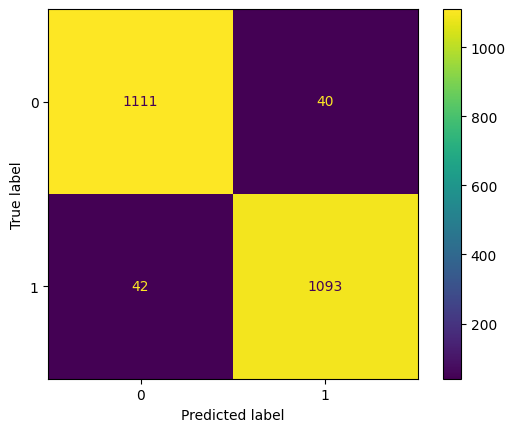

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

The result was excellent, but let's remove the features that are of little value to the model in order to optimize the model.

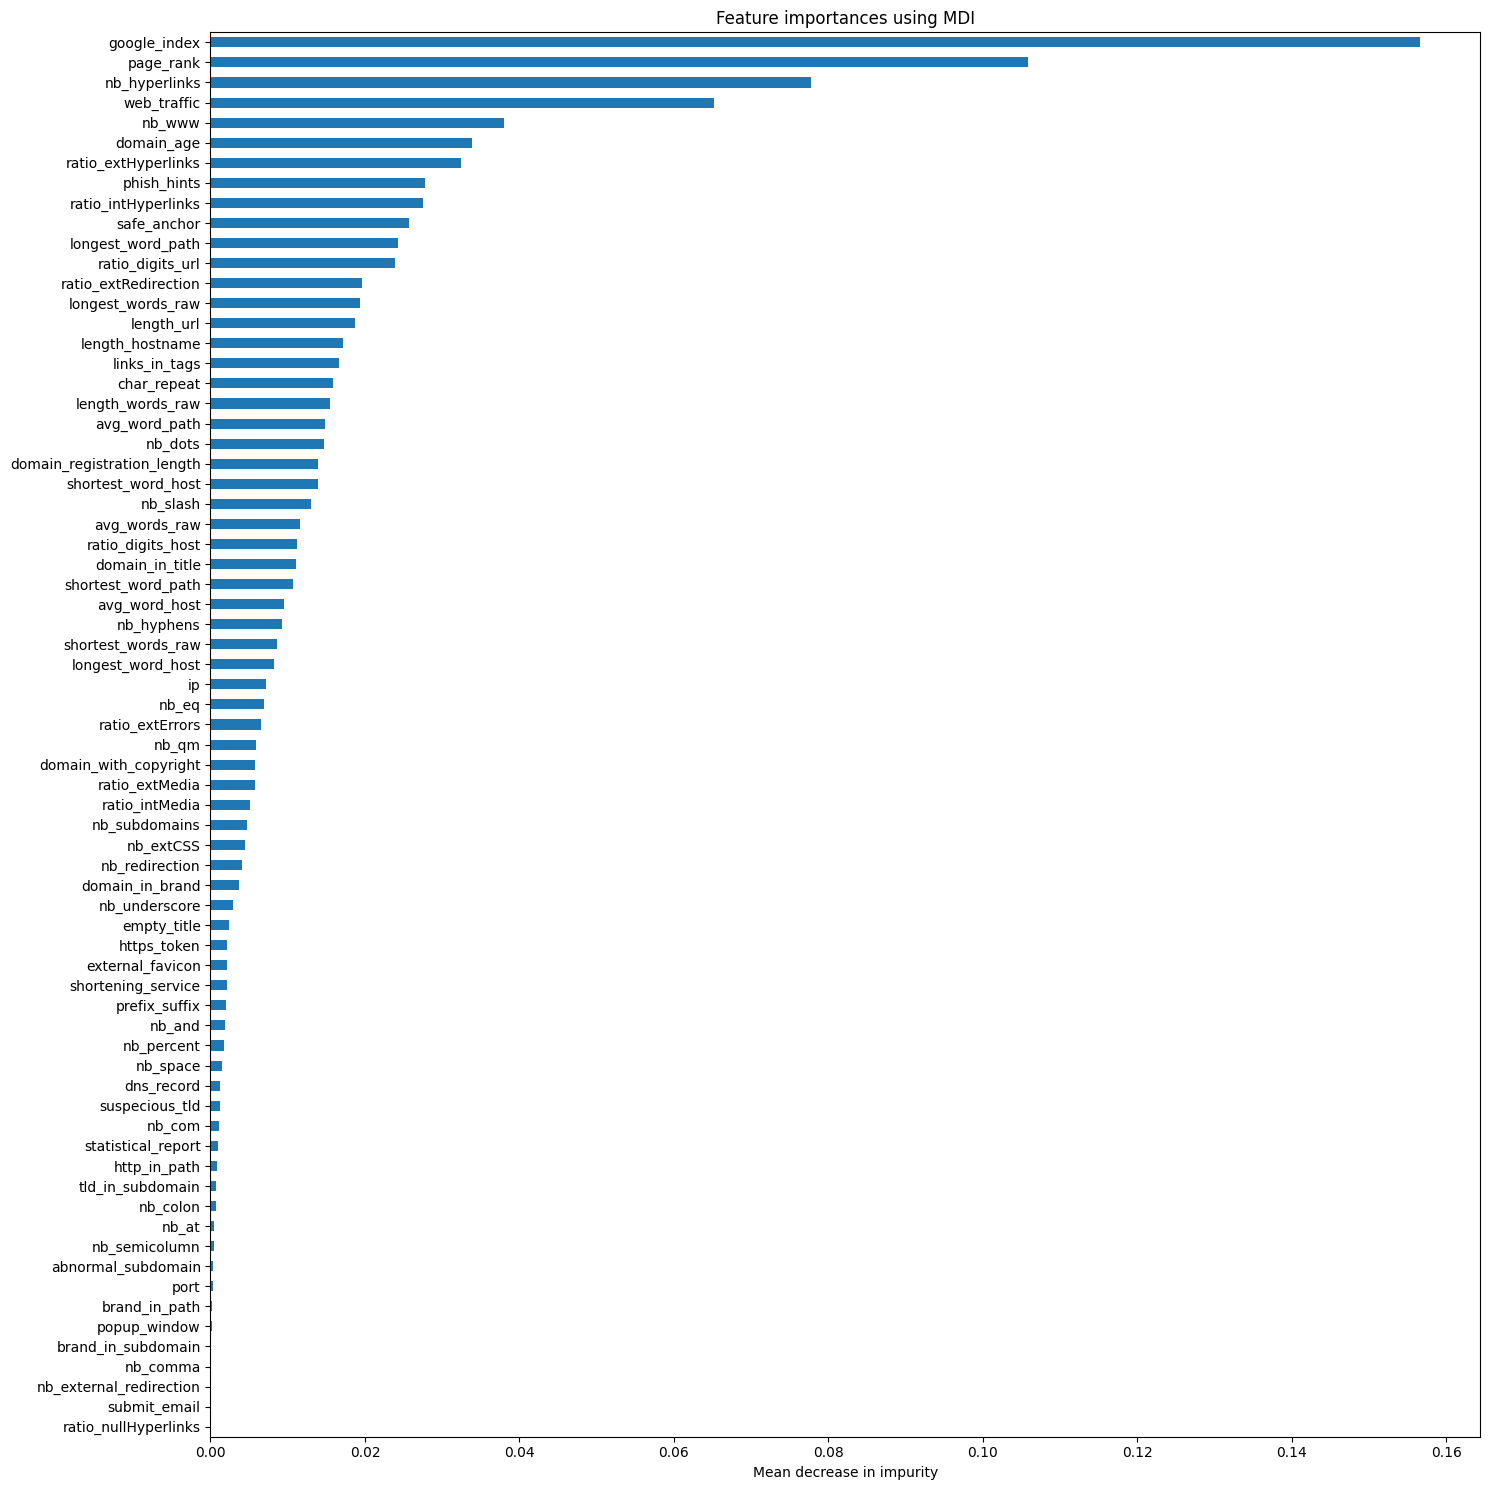

In [ ]:
importances = best_model.feature_importances_


forest_importances = pd.Series(importances, index= X_train.columns).sort_values()

fig, ax = plt.subplots(figsize = (15,15))

forest_importances.plot.barh(ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

We are building a logistic regression to assess the direction of the influence of the features

In [96]:
def  objective (trial):

    C  =  trial.suggest_categorical( name = "C" , choices = [ 0.001,0.01,0.1,1,1, 10, 100])

    params  = {
         "C" : C 
    }
    model  =  Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=1234,max_iter=7000, **params))])
    
    cv_score  =  cross_val_score( model, X_train , y_train , n_jobs = 4 , cv = 5 )
    mean_cv_accuracy  =  cv_score.mean()
    
    return mean_cv_accuracy 

study  =  optuna.create_study(direction='maximize')
study.optimize ( objective , n_trials =20)


[I 2025-01-13 12:00:54,882] A new study created in memory with name: no-name-308b2211-230f-46b6-bd33-3ec38f4a728e
[I 2025-01-13 12:00:55,090] Trial 0 finished with value: 0.9461946059893307 and parameters: {'C': 100}. Best is trial 0 with value: 0.9461946059893307.
[I 2025-01-13 12:00:55,258] Trial 1 finished with value: 0.9418202722249008 and parameters: {'C': 0.01}. Best is trial 0 with value: 0.9461946059893307.
[I 2025-01-13 12:00:55,457] Trial 2 finished with value: 0.9461946059893307 and parameters: {'C': 100}. Best is trial 0 with value: 0.9461946059893307.
[I 2025-01-13 12:00:55,614] Trial 3 finished with value: 0.9321965704495888 and parameters: {'C': 0.001}. Best is trial 0 with value: 0.9461946059893307.
[I 2025-01-13 12:00:55,812] Trial 4 finished with value: 0.9461946059893307 and parameters: {'C': 100}. Best is trial 0 with value: 0.9461946059893307.
[I 2025-01-13 12:00:55,970] Trial 5 finished with value: 0.9321965704495888 and parameters: {'C': 0.001}. Best is trial 0 w

In [ ]:
best_model_lr  =  Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=1234,max_iter=7000, **study. best_params))])



best_model_lr.fit(X_train ,y_train)

y_pred  =  best_model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1151
           1       0.96      0.96      0.96      1135

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



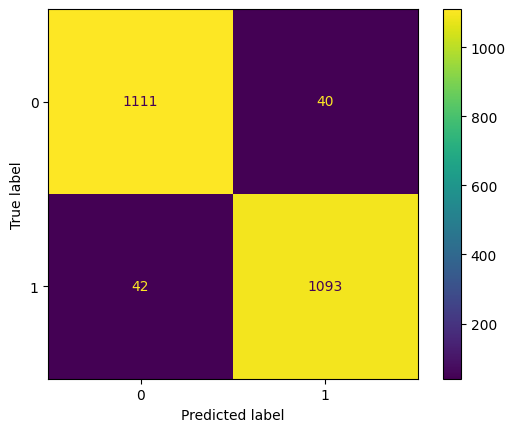

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

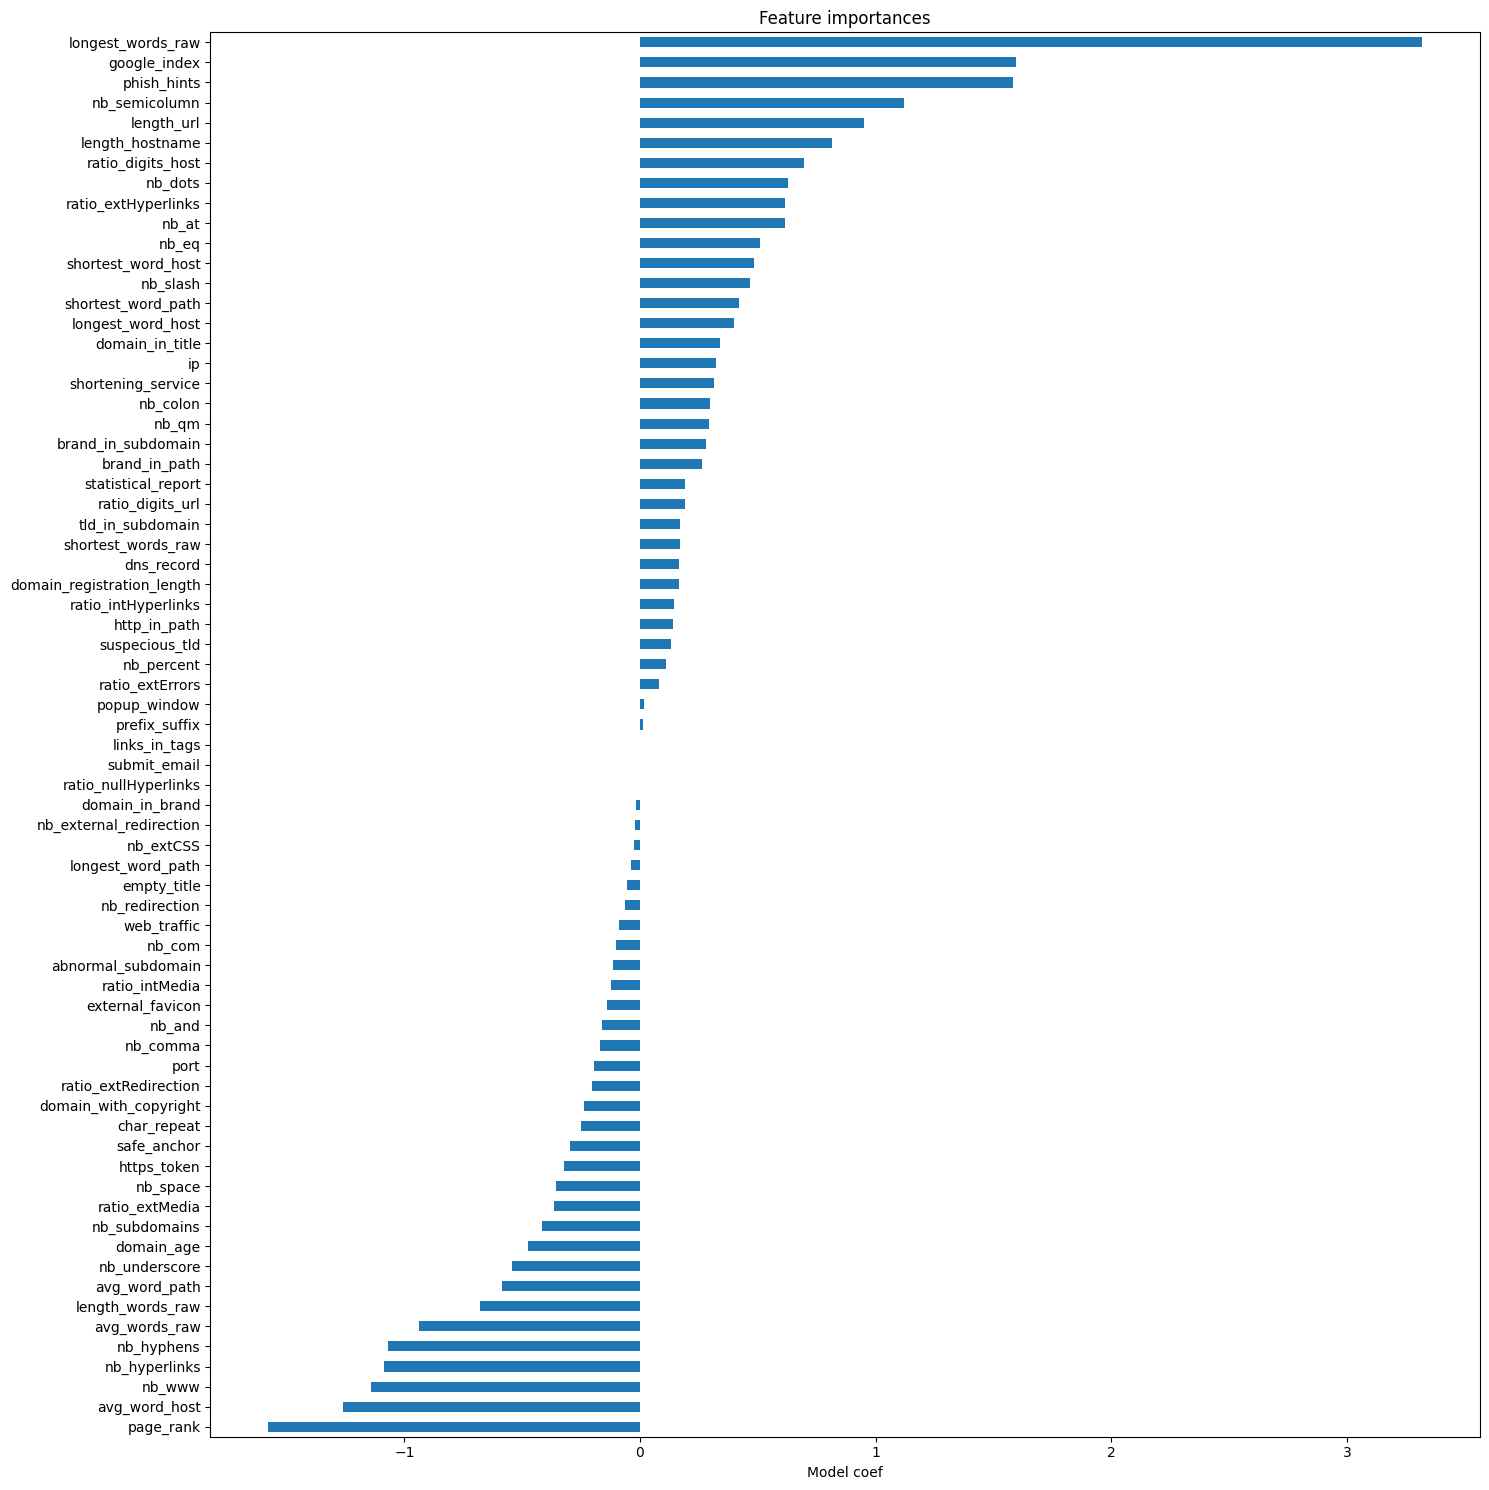

In [ ]:
importances = best_model_lr.steps[1][1].coef_[0]



linear_importances = pd.Series(importances, index= X_train.columns).sort_values()

fig, ax = plt.subplots(figsize = (15,15))

linear_importances.plot.barh(ax=ax)

ax.set_title("Feature importances")
ax.set_xlabel("Model coef")
fig.tight_layout()
plt.show()

In [100]:
def min_max_scale(x):
    return (x - x.min())/(x.max() - x.min())

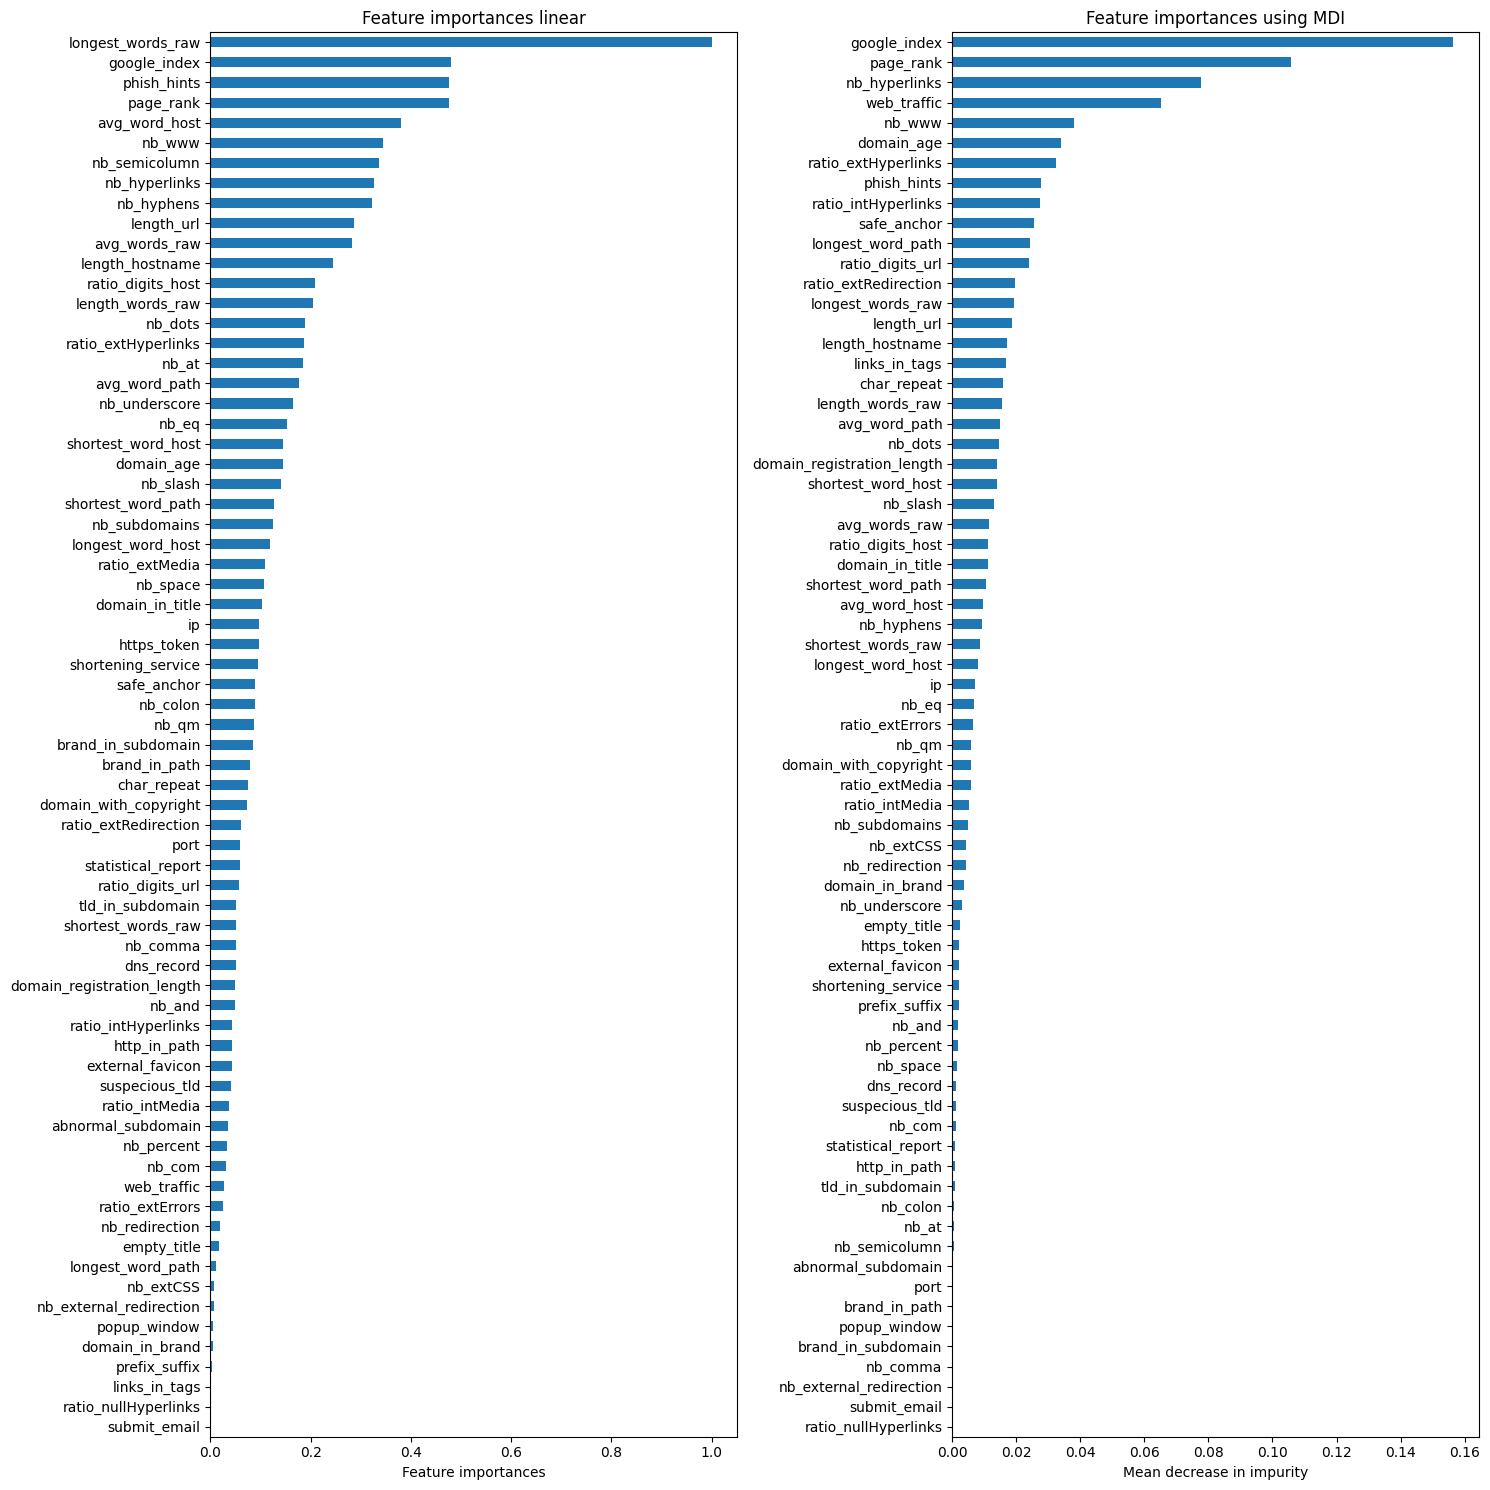

In [101]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize = (15,15))




min_max_scale(linear_importances.abs()).sort_values().plot.barh(ax=ax_1)

ax_1.set_title("Feature importances linear")
ax_1.set_xlabel("Feature importances")

forest_importances.plot.barh(ax=ax_2)

ax_2.set_title("Feature importances using MDI")
ax_2.set_xlabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [9]:
drop_features = ['submit_email', 'ratio_nullHyperlinks', 'nb_external_redirection',  'popup_window', 'nb_com', 'empty_title']

In [10]:
X = X.drop(drop_features, axis= 1)

NameError: name 'X' is not defined

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [ ]:

best_model.fit(X_train ,y_train )

y_pred  =  best_model.predict(X_test)


print(classification_report(y_test, y_pred))

In [ ]:
best_model_lr.fit(X_train ,y_train )

y_pred  =  best_model_lr.predict(X_test)


print(classification_report(y_test, y_pred))

Conclusion: from the analysis above, we were able to understand which features have value and which do not, and removed those features that have no value. But our models are difficult to apply in the real world, so it is necessary to build a model that will extract information ONLY from the link, without involving third-party resources.

The task: to build a neural network based ONLY on the links that we have, without involving additional information and third-party services.

In [11]:
df['url'].apply(lambda s : len(s)).describe()

count    11430.000000
mean        61.120035
std         55.292470
min         12.000000
25%         33.000000
50%         47.000000
75%         71.000000
max       1641.000000
Name: url, dtype: float64

In [12]:
df['url'].apply(lambda s : len(s)).quantile(0.99)

np.float64(263.0)

In [13]:
df_text = df[['url', 'status']]
df_text

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate
...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,phishing
11427,https://www.facebook.com/Interactive-Televisio...,legitimate
11428,http://www.mypublicdomainpictures.com/,legitimate


In [14]:
vocab = df['url'].apply(list).apply(pd.Series).stack().unique()
vocab

array(['h', 't', 'p', ':', '/', 'w', '.', 'c', 'r', 'e', 's', 'o', 'n',
       'd', 'm', 'u', 'a', 'l', 'g', 'y', 'V', '4', 'v', 'i', '1', '8',
       '3', '9', '0', 'b', 'f', '-', 'k', '6', '?', '=', '_', '&', '7',
       '5', '2', 'j', 'z', 'A', 'M', 'N', 'P', 'D', 'H', 'L', ';', '@',
       'q', 'x', 'Z', 'T', 'O', 'S', 'I', 'E', 'Y', 'X', 'W', 'K', 'B',
       'C', 'Q', 'U', 'F', 'J', '#', '%', 'R', 'G', '~', '+', '[', ']',
       '(', ')', ',', '{', '}', '!', '$', "'", '*', 'µ', '拠', '傅', '`',
       'Ã', '\x83', 'Â', '\x82', '\xa0', '^', '\x91', ' ', '<'],
      dtype=object)

In [15]:
vocab = {k:v for v,k in enumerate(vocab, 1)}

In [16]:
vocab

{'h': 1,
 't': 2,
 'p': 3,
 ':': 4,
 '/': 5,
 'w': 6,
 '.': 7,
 'c': 8,
 'r': 9,
 'e': 10,
 's': 11,
 'o': 12,
 'n': 13,
 'd': 14,
 'm': 15,
 'u': 16,
 'a': 17,
 'l': 18,
 'g': 19,
 'y': 20,
 'V': 21,
 '4': 22,
 'v': 23,
 'i': 24,
 '1': 25,
 '8': 26,
 '3': 27,
 '9': 28,
 '0': 29,
 'b': 30,
 'f': 31,
 '-': 32,
 'k': 33,
 '6': 34,
 '?': 35,
 '=': 36,
 '_': 37,
 '&': 38,
 '7': 39,
 '5': 40,
 '2': 41,
 'j': 42,
 'z': 43,
 'A': 44,
 'M': 45,
 'N': 46,
 'P': 47,
 'D': 48,
 'H': 49,
 'L': 50,
 ';': 51,
 '@': 52,
 'q': 53,
 'x': 54,
 'Z': 55,
 'T': 56,
 'O': 57,
 'S': 58,
 'I': 59,
 'E': 60,
 'Y': 61,
 'X': 62,
 'W': 63,
 'K': 64,
 'B': 65,
 'C': 66,
 'Q': 67,
 'U': 68,
 'F': 69,
 'J': 70,
 '#': 71,
 '%': 72,
 'R': 73,
 'G': 74,
 '~': 75,
 '+': 76,
 '[': 77,
 ']': 78,
 '(': 79,
 ')': 80,
 ',': 81,
 '{': 82,
 '}': 83,
 '!': 84,
 '$': 85,
 "'": 86,
 '*': 87,
 'µ': 88,
 '拠': 89,
 '傅': 90,
 '`': 91,
 'Ã': 92,
 '\x83': 93,
 'Â': 94,
 '\x82': 95,
 '\xa0': 96,
 '^': 97,
 '\x91': 98,
 ' ': 99,
 '<': 1

In [17]:
df_text['tokens'] =  df_text['url'].apply(list)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26488\3127892793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['tokens'] =  df_text['url'].apply(list)


In [18]:
df_text

,url,status,tokens
0,http://www.crestonwood.com/router.php,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., c, r, e, s, ..."
1,http://shadetreetechnology.com/V4/validation/a...,phishing,"[h, t, t, p, :, /, /, s, h, a, d, e, t, r, e, ..."
2,https://support-appleld.com.secureupdate.duila...,phishing,"[h, t, t, p, s, :, /, /, s, u, p, p, o, r, t, ..."
3,http://rgipt.ac.in,legitimate,"[h, t, t, p, :, /, /, r, g, i, p, t, ., a, c, ..."
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., i, r, a, c, ..."
...,...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., f, o, n, t, ..."
11426,http://www.budgetbots.com/server.php/Server%20...,phishing,"[h, t, t, p, :, /, /, w, w, w, ., b, u, d, g, ..."
11427,https://www.facebook.com/Interactive-Televisio...,legitimate,"[h, t, t, p, s, :, /, /, w, w, w, ., f, a, c, ..."
11428,http://www.mypublicdomainpictures.com/,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., m, y, p, u, ..."


In [19]:
df_text['idx'] = df_text['tokens'].apply(lambda x: list(map(lambda y: vocab[y],x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_26488\1446237092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['idx'] = df_text['tokens'].apply(lambda x: list(map(lambda y: vocab[y],x)))


In [20]:
df_text

,url,status,tokens,idx
0,http://www.crestonwood.com/router.php,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., c, r, e, s, ...","[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 8, 9, 10, 11..."
1,http://shadetreetechnology.com/V4/validation/a...,phishing,"[h, t, t, p, :, /, /, s, h, a, d, e, t, r, e, ...","[1, 2, 2, 3, 4, 5, 5, 11, 1, 17, 14, 10, 2, 9,..."
2,https://support-appleld.com.secureupdate.duila...,phishing,"[h, t, t, p, s, :, /, /, s, u, p, p, o, r, t, ...","[1, 2, 2, 3, 11, 4, 5, 5, 11, 16, 3, 3, 12, 9,..."
3,http://rgipt.ac.in,legitimate,"[h, t, t, p, :, /, /, r, g, i, p, t, ., a, c, ...","[1, 2, 2, 3, 4, 5, 5, 9, 19, 24, 3, 2, 7, 17, ..."
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., i, r, a, c, ...","[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 24, 9, 17, 8..."
...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., f, o, n, t, ...","[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 31, 12, 13, ..."
11426,http://www.budgetbots.com/server.php/Server%20...,phishing,"[h, t, t, p, :, /, /, w, w, w, ., b, u, d, g, ...","[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 30, 16, 14, ..."
11427,https://www.facebook.com/Interactive-Televisio...,legitimate,"[h, t, t, p, s, :, /, /, w, w, w, ., f, a, c, ...","[1, 2, 2, 3, 11, 4, 5, 5, 6, 6, 6, 7, 31, 17, ..."
11428,http://www.mypublicdomainpictures.com/,legitimate,"[h, t, t, p, :, /, /, w, w, w, ., m, y, p, u, ...","[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 15, 20, 3, 1..."


In [21]:
df_text = df_text.drop(['tokens', 'url'], axis = 1)

In [22]:
df_text['idx'].apply(len).max()

np.int64(1641)

In [23]:
df_text

,status,idx
0,legitimate,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 8, 9, 10, 11..."
1,phishing,"[1, 2, 2, 3, 4, 5, 5, 11, 1, 17, 14, 10, 2, 9,..."
2,phishing,"[1, 2, 2, 3, 11, 4, 5, 5, 11, 16, 3, 3, 12, 9,..."
3,legitimate,"[1, 2, 2, 3, 4, 5, 5, 9, 19, 24, 3, 2, 7, 17, ..."
4,legitimate,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 24, 9, 17, 8..."
...,...,...
11425,legitimate,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 31, 12, 13, ..."
11426,phishing,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 30, 16, 14, ..."
11427,legitimate,"[1, 2, 2, 3, 11, 4, 5, 5, 6, 6, 6, 7, 31, 17, ..."
11428,legitimate,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 15, 20, 3, 1..."


In [24]:
df_text['status']  = df_text['status'].apply(lambda x:  0 if x  == 'legitimate' else 1 )

In [25]:
df_text

,status,idx
0,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 8, 9, 10, 11..."
1,1,"[1, 2, 2, 3, 4, 5, 5, 11, 1, 17, 14, 10, 2, 9,..."
2,1,"[1, 2, 2, 3, 11, 4, 5, 5, 11, 16, 3, 3, 12, 9,..."
3,0,"[1, 2, 2, 3, 4, 5, 5, 9, 19, 24, 3, 2, 7, 17, ..."
4,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 24, 9, 17, 8..."
...,...,...
11425,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 31, 12, 13, ..."
11426,1,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 30, 16, 14, ..."
11427,0,"[1, 2, 2, 3, 11, 4, 5, 5, 6, 6, 6, 7, 31, 17, ..."
11428,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 15, 20, 3, 1..."


In [26]:
df_text = df_text[df_text['idx'].apply(len) <= 263]

In [27]:
df_text

,status,idx
0,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 8, 9, 10, 11..."
1,1,"[1, 2, 2, 3, 4, 5, 5, 11, 1, 17, 14, 10, 2, 9,..."
2,1,"[1, 2, 2, 3, 11, 4, 5, 5, 11, 16, 3, 3, 12, 9,..."
3,0,"[1, 2, 2, 3, 4, 5, 5, 9, 19, 24, 3, 2, 7, 17, ..."
4,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 24, 9, 17, 8..."
...,...,...
11424,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 17, 13, 11, ..."
11425,0,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 31, 12, 13, ..."
11426,1,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 6, 7, 30, 16, 14, ..."
11427,0,"[1, 2, 2, 3, 11, 4, 5, 5, 6, 6, 6, 7, 31, 17, ..."


In [28]:
y = torch.tensor(df_text['status'].values)
y

tensor([0, 1, 1,  ..., 1, 0, 0])

In [29]:
x = torch.zeros(11322, 263).long()

In [30]:
df_text.iloc[1,1]

[1,
 2,
 2,
 3,
 4,
 5,
 5,
 11,
 1,
 17,
 14,
 10,
 2,
 9,
 10,
 10,
 2,
 10,
 8,
 1,
 13,
 12,
 18,
 12,
 19,
 20,
 7,
 8,
 12,
 15,
 5,
 21,
 22,
 5,
 23,
 17,
 18,
 24,
 14,
 17,
 2,
 24,
 12,
 13,
 5,
 17,
 25,
 25,
 25,
 17,
 10,
 14,
 8,
 26,
 17,
 10,
 27,
 28,
 29,
 10,
 17,
 30,
 8,
 31,
 17,
 25,
 27,
 29,
 10,
 29,
 22,
 25,
 17,
 25,
 29,
 17,
 22]

In [31]:
for i in range(11322):

    x[i,:len(df_text.iloc[i,1])] = torch.tensor(df_text.iloc[i,1]).long()

In [32]:
x

tensor([[1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0],
        ...,
        [1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0]])

In [33]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.2, random_state=1234 )

In [34]:
x_train

tensor([[1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0],
        ...,
        [1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0],
        [1, 2, 2,  ..., 0, 0, 0]])

In [35]:
x_train.shape

torch.Size([9057, 263])

In [36]:
y_train.shape

torch.Size([9057])

In [37]:
batch_size = 64

dataset_train = torch.utils.data.TensorDataset(x_train, y_train)
dataset_test = torch.utils.data.TensorDataset(x_test, y_test)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size)

dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size)

In [38]:
next(iter(dataloader_train))

[tensor([[1, 2, 2,  ..., 0, 0, 0],
         [1, 2, 2,  ..., 0, 0, 0],
         [1, 2, 2,  ..., 0, 0, 0],
         ...,
         [1, 2, 2,  ..., 0, 0, 0],
         [1, 2, 2,  ..., 0, 0, 0],
         [1, 2, 2,  ..., 0, 0, 0]]),
 tensor([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
         0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
         1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])]

In [41]:
class FishingLstm(torch.nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, dropout=0.3, lstm_layers = 1 ):
        super().__init__()
        self.emb = torch.nn.Embedding(vocab_size,emb_dim,padding_idx = 0)
        self.lstm = torch.nn.LSTM(emb_dim, hidden_dim, num_layers= lstm_layers,dropout = dropout, batch_first=True)
        self.clf = torch.nn.Linear(hidden_dim, hidden_dim)
        self.out = torch.nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        x = self.emb(x)
        x, (long_mem, short_mem) = self.lstm(x)
        x = self.clf(x[:,-1,:])
        x = torch.nn.functional.relu(x)
        x = self.out(x)
        x = torch.nn.functional.sigmoid(x)

        return x 
        
        

In [68]:
vocab_size = 101
emb_dim = 128
hidden_dim = 128


In [69]:
model = FishingLstm(vocab_size, emb_dim, hidden_dim,lstm_layers=2)

print(model)

FishingLstm(
  (emb): Embedding(101, 128, padding_idx=0)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True, dropout=0.3)
  (clf): Linear(in_features=128, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=1, bias=True)
)


In [70]:
model = model.to(device)

optimaizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
criteria  = torch.nn.BCELoss()

criteria = criteria.to(device)


In [46]:
def torch_acc(y_pred, y_true):
    y_pred_round = torch.round(y_pred)
    y_corr = (y_pred_round == y_true).float()
    
    return  y_corr.sum() / len(y_corr)
    

In [72]:
n_epoch = 10

list_loss_train  = []
list_loss_test = []

list_acc_train = []
list_acc_test = []

for epoch in range(1, n_epoch + 1):
    list_loss_train_epoch  = []
    list_loss_test_epoch = []
    list_acc_train_epoch = []
    list_acc_test_epoch = []
    
    model.train()
    
    for x_batch_train, y_batch_train in dataloader_train:
        x_batch_train = x_batch_train.to(device)
        y_batch_train = y_batch_train.to(device).float()
        
        optimaizer.zero_grad()
        
        y_pred = model(x_batch_train).squeeze()
        loss_train = criteria(y_pred, y_batch_train)
        accuracy = torch_acc(y_pred, y_batch_train)
        
        loss_train.backward()
        optimaizer.step()
        
        list_loss_train_epoch.append(loss_train.detach().cpu().item())
        list_acc_train_epoch.append(accuracy.detach().cpu().item())
        
        
    model.eval()
    
        
    for x_batch_test, y_batch_test in dataloader_test:
        x_batch_test = x_batch_test.to(device)
        y_batch_test = y_batch_test.to(device).float()
        
        with torch.no_grad():
            y_pred = model(x_batch_test).squeeze()
        
        loss_test = criteria(y_pred, y_batch_test)
        accuracy = torch_acc(y_pred, y_batch_test)
        list_loss_test_epoch.append(loss_test.detach().cpu().item())
        list_acc_test_epoch.append(accuracy.detach().cpu().item())    
    
    
    loss_train_epoch =  sum(list_loss_train_epoch) / len(list_loss_train_epoch)
    loss_test_epoch = sum(list_loss_test_epoch) / len(list_loss_test_epoch)
    
    acc_train_epoch = sum(list_acc_train_epoch) / len(list_acc_train_epoch)
    acc_test_epoch = sum(list_acc_test_epoch) / len(list_acc_test_epoch)
    
    list_loss_train.append(loss_train_epoch)
    list_loss_test.append(loss_test_epoch)

    list_acc_train.append(acc_train_epoch)
    list_acc_test.append(acc_test_epoch)
    
    
    print(f'epoch: {epoch}, loss_train: {loss_train_epoch}, loss_test: {loss_test_epoch}, acc_train: {acc_train_epoch: .4f}, acc_test: {acc_test_epoch: .4f} ')


epoch: 1, loss_train: 0.6932366246908483, loss_test: 0.6928330196274651, acc_train:  0.4968, acc_test:  0.5175 
epoch: 2, loss_train: 0.6932034299407207, loss_test: 0.6928366372982661, acc_train:  0.4972, acc_test:  0.5179 
epoch: 3, loss_train: 0.6931627153510779, loss_test: 0.6927982370058695, acc_train:  0.4980, acc_test:  0.5184 
epoch: 4, loss_train: 0.6930471352288421, loss_test: 0.6924881190061569, acc_train:  0.4993, acc_test:  0.5192 
epoch: 5, loss_train: 0.7030129965762018, loss_test: 0.6927745938301086, acc_train:  0.5082, acc_test:  0.5170 
epoch: 6, loss_train: 0.6934172830111544, loss_test: 0.6927338871690962, acc_train:  0.5029, acc_test:  0.5170 
epoch: 7, loss_train: 0.693258285942212, loss_test: 0.6927063663800558, acc_train:  0.5028, acc_test:  0.5170 
epoch: 8, loss_train: 0.6932749265516308, loss_test: 0.6926840659644868, acc_train:  0.5054, acc_test:  0.5170 
epoch: 9, loss_train: 0.6932322097496247, loss_test: 0.6926875511805216, acc_train:  0.5035, acc_test:  0

We are working with new data that contains more complete information.

In [10]:
df_new = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

In [11]:
df_new.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

<Axes: ylabel='count'>

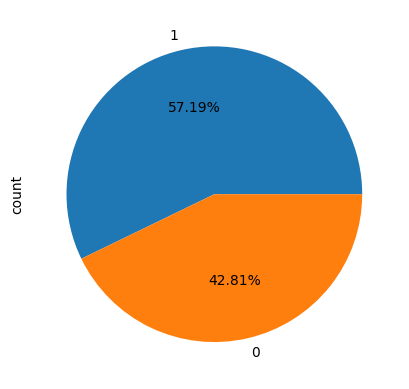

In [17]:
df_new['label'].value_counts().plot.pie(autopct = "%.2f%%")

In [14]:
df_new['URL'].apply(lambda s : len(s)).describe()

count    235795.000000
mean         35.366954
std          41.214346
min          14.000000
25%          24.000000
50%          28.000000
75%          35.000000
max        6097.000000
Name: URL, dtype: float64

In [16]:
df_new['URL'].apply(lambda s : len(s)).quantile(0.99)

np.float64(144.0)

In [18]:
df_new = df_new[df_new['URL'].apply(len) <= 144]

<Axes: ylabel='count'>

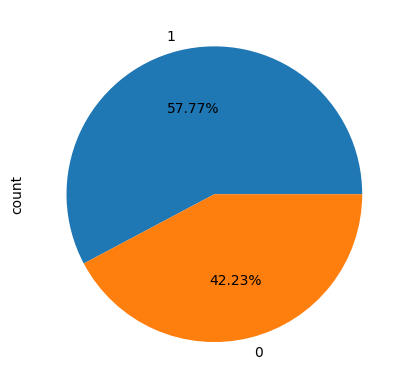

In [19]:
df_new['label'].value_counts().plot.pie(autopct = "%.2f%%")

In [21]:
df_new_text = df_new[['URL', 'label']]
df_new_text

,URL,label
0,https://www.southbankmosaics.com,1
1,https://www.uni-mainz.de,1
2,https://www.voicefmradio.co.uk,1
3,https://www.sfnmjournal.com,1
4,https://www.rewildingargentina.org,1
...,...,...
235790,https://www.skincareliving.com,1
235791,https://www.winchester.gov.uk,1
235792,https://www.nononsensedesign.be,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0


In [22]:
vocab_new = df_new_text['URL'].apply(list).apply(pd.Series).stack().unique()
vocab_new

array(['h', 't', 'p', 's', ':', '/', 'w', '.', 'o', 'u', 'b', 'a', 'n',
       'k', 'm', 'i', 'c', '-', 'z', 'd', 'e', 'v', 'f', 'r', 'j', 'l',
       'g', 'y', '6', '1', 'x', '0', '5', '9', '4', 'q', '2', '3', '8',
       '?', '=', '@', '7', '_', '%', '&', '!', '+', ';', '#', '(', ')',
       '~', '[', ']', '*', '$', ',', "'", 'Ã', '£', 'Å', '“', 'Â', '¤',
       '¢', 'â', '‚', '¬', '€', '¹'], dtype=object)

In [23]:
vocab_new = {k:v for v,k in enumerate(vocab_new, 1)}

In [24]:
vocab_new

{'h': 1,
 't': 2,
 'p': 3,
 's': 4,
 ':': 5,
 '/': 6,
 'w': 7,
 '.': 8,
 'o': 9,
 'u': 10,
 'b': 11,
 'a': 12,
 'n': 13,
 'k': 14,
 'm': 15,
 'i': 16,
 'c': 17,
 '-': 18,
 'z': 19,
 'd': 20,
 'e': 21,
 'v': 22,
 'f': 23,
 'r': 24,
 'j': 25,
 'l': 26,
 'g': 27,
 'y': 28,
 '6': 29,
 '1': 30,
 'x': 31,
 '0': 32,
 '5': 33,
 '9': 34,
 '4': 35,
 'q': 36,
 '2': 37,
 '3': 38,
 '8': 39,
 '?': 40,
 '=': 41,
 '@': 42,
 '7': 43,
 '_': 44,
 '%': 45,
 '&': 46,
 '!': 47,
 '+': 48,
 ';': 49,
 '#': 50,
 '(': 51,
 ')': 52,
 '~': 53,
 '[': 54,
 ']': 55,
 '*': 56,
 '$': 57,
 ',': 58,
 "'": 59,
 'Ã': 60,
 '£': 61,
 'Å': 62,
 '“': 63,
 'Â': 64,
 '¤': 65,
 '¢': 66,
 'â': 67,
 '‚': 68,
 '¬': 69,
 '€': 70,
 '¹': 71}

In [25]:
df_new_text['tokens'] =  df_new_text['URL'].apply(list)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21932\573313143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_text['tokens'] =  df_new_text['URL'].apply(list)


In [26]:
df_new_text

,URL,label,tokens
0,https://www.southbankmosaics.com,1,"[h, t, t, p, s, :, /, /, w, w, w, ., s, o, u, ..."
1,https://www.uni-mainz.de,1,"[h, t, t, p, s, :, /, /, w, w, w, ., u, n, i, ..."
2,https://www.voicefmradio.co.uk,1,"[h, t, t, p, s, :, /, /, w, w, w, ., v, o, i, ..."
3,https://www.sfnmjournal.com,1,"[h, t, t, p, s, :, /, /, w, w, w, ., s, f, n, ..."
4,https://www.rewildingargentina.org,1,"[h, t, t, p, s, :, /, /, w, w, w, ., r, e, w, ..."
...,...,...,...
235790,https://www.skincareliving.com,1,"[h, t, t, p, s, :, /, /, w, w, w, ., s, k, i, ..."
235791,https://www.winchester.gov.uk,1,"[h, t, t, p, s, :, /, /, w, w, w, ., w, i, n, ..."
235792,https://www.nononsensedesign.be,1,"[h, t, t, p, s, :, /, /, w, w, w, ., n, o, n, ..."
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0,"[h, t, t, p, s, :, /, /, p, a, t, i, e, n, t, ..."


In [28]:
df_new_text['idx'] = df_new_text['tokens'].apply(lambda x: list(map(lambda y: vocab_new[y],x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_21932\3564433360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_text['idx'] = df_new_text['tokens'].apply(lambda x: list(map(lambda y: vocab_new[y],x)))


In [29]:
df_new_text

,URL,label,tokens,idx
0,https://www.southbankmosaics.com,1,"[h, t, t, p, s, :, /, /, w, w, w, ., s, o, u, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 4, 9, 10,..."
1,https://www.uni-mainz.de,1,"[h, t, t, p, s, :, /, /, w, w, w, ., u, n, i, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 10, 13, 1..."
2,https://www.voicefmradio.co.uk,1,"[h, t, t, p, s, :, /, /, w, w, w, ., v, o, i, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 22, 9, 16..."
3,https://www.sfnmjournal.com,1,"[h, t, t, p, s, :, /, /, w, w, w, ., s, f, n, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 4, 23, 13..."
4,https://www.rewildingargentina.org,1,"[h, t, t, p, s, :, /, /, w, w, w, ., r, e, w, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 24, 21, 7..."
...,...,...,...,...
235790,https://www.skincareliving.com,1,"[h, t, t, p, s, :, /, /, w, w, w, ., s, k, i, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 4, 14, 16..."
235791,https://www.winchester.gov.uk,1,"[h, t, t, p, s, :, /, /, w, w, w, ., w, i, n, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 7, 16, 13..."
235792,https://www.nononsensedesign.be,1,"[h, t, t, p, s, :, /, /, w, w, w, ., n, o, n, ...","[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 13, 9, 13..."
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,0,"[h, t, t, p, s, :, /, /, p, a, t, i, e, n, t, ...","[1, 2, 2, 3, 4, 5, 6, 6, 3, 12, 2, 16, 21, 13,..."


In [31]:
df_new_text = df_new_text.drop(['tokens', 'URL'], axis= 1)

In [32]:
df_new_text

,label,idx
0,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 4, 9, 10,..."
1,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 10, 13, 1..."
2,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 22, 9, 16..."
3,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 4, 23, 13..."
4,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 24, 21, 7..."
...,...,...
235790,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 4, 14, 16..."
235791,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 7, 16, 13..."
235792,1,"[1, 2, 2, 3, 4, 5, 6, 6, 7, 7, 7, 8, 13, 9, 13..."
235793,0,"[1, 2, 2, 3, 4, 5, 6, 6, 3, 12, 2, 16, 21, 13,..."


In [33]:
y = torch.tensor(df_new_text['label'].values)
y

tensor([1, 1, 1,  ..., 1, 0, 1])

In [34]:
x = torch.zeros(233438 , 144).long()

In [35]:
for i in range(233438):

    x[i,:len(df_new_text.iloc[i,1])] = torch.tensor(df_new_text.iloc[i,1]).long()

In [36]:
x.shape

torch.Size([233438, 144])

In [38]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.1, random_state=1234 )

In [39]:
batch_size = 64

dataset_train = torch.utils.data.TensorDataset(x_train, y_train)
dataset_test = torch.utils.data.TensorDataset(x_test, y_test)

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size = batch_size)

dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size = batch_size)

In [42]:
vocab_size = 72
emb_dim = 128
hidden_dim = 128


In [51]:
model = FishingLstm(vocab_size, emb_dim, hidden_dim,lstm_layers=2)

print(model)

FishingLstm(
  (emb): Embedding(72, 128, padding_idx=0)
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True, dropout=0.3)
  (clf): Linear(in_features=128, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=1, bias=True)
)


In [52]:
model = model.to(device)

optimaizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
criteria  = torch.nn.BCELoss()

criteria = criteria.to(device)


In [53]:
n_epoch = 10

list_loss_train  = []
list_loss_test = []

list_acc_train = []
list_acc_test = []

for epoch in range(1, n_epoch + 1):
    list_loss_train_epoch  = []
    list_loss_test_epoch = []
    list_acc_train_epoch = []
    list_acc_test_epoch = []
    
    model.train()
    
    print('training... :', epoch)
    
    for x_batch_train, y_batch_train in  tqdm(dataloader_train):
        x_batch_train = x_batch_train.to(device)
        y_batch_train = y_batch_train.to(device).float()
        
        optimaizer.zero_grad()
        
        y_pred = model(x_batch_train).squeeze()
        loss_train = criteria(y_pred, y_batch_train)
        accuracy = torch_acc(y_pred, y_batch_train)
        
        loss_train.backward()
        optimaizer.step()
        
        list_loss_train_epoch.append(loss_train.detach().cpu().item())
        list_acc_train_epoch.append(accuracy.detach().cpu().item())
        
        
    model.eval()
    
    print('evaluating... :', epoch)
    
        
    for x_batch_test, y_batch_test in tqdm(dataloader_test):
        x_batch_test = x_batch_test.to(device)
        y_batch_test = y_batch_test.to(device).float()
        
        with torch.no_grad():
            y_pred = model(x_batch_test).squeeze()
        
        loss_test = criteria(y_pred, y_batch_test)
        accuracy = torch_acc(y_pred, y_batch_test)
        list_loss_test_epoch.append(loss_test.detach().cpu().item())
        list_acc_test_epoch.append(accuracy.detach().cpu().item())    
    
    
    loss_train_epoch =  sum(list_loss_train_epoch) / len(list_loss_train_epoch)
    loss_test_epoch = sum(list_loss_test_epoch) / len(list_loss_test_epoch)
    
    acc_train_epoch = sum(list_acc_train_epoch) / len(list_acc_train_epoch)
    acc_test_epoch = sum(list_acc_test_epoch) / len(list_acc_test_epoch)
    
    list_loss_train.append(loss_train_epoch)
    list_loss_test.append(loss_test_epoch)

    list_acc_train.append(acc_train_epoch)
    list_acc_test.append(acc_test_epoch)
    
    
    print(f'epoch: {epoch}, loss_train: {loss_train_epoch}, loss_test: {loss_test_epoch}, acc_train: {acc_train_epoch: .4f}, acc_test: {acc_test_epoch: .4f} ')


training... : 1


100%|██████████| 3283/3283 [02:14<00:00, 24.38it/s]


evaluating... : 1


100%|██████████| 365/365 [00:03<00:00, 93.07it/s]


epoch: 1, loss_train: 0.4838556132798188, loss_test: 0.036850101218801244, acc_train:  0.7396, acc_test:  0.9923 
training... : 2


100%|██████████| 3283/3283 [02:13<00:00, 24.52it/s]


evaluating... : 2


100%|██████████| 365/365 [00:04<00:00, 90.08it/s]


epoch: 2, loss_train: 0.01991756485880146, loss_test: 0.014509380555852023, acc_train:  0.9962, acc_test:  0.9976 
training... : 3


100%|██████████| 3283/3283 [02:13<00:00, 24.56it/s]


evaluating... : 3


100%|██████████| 365/365 [00:03<00:00, 94.94it/s]


epoch: 3, loss_train: 0.017080928329167026, loss_test: 0.018632942440039286, acc_train:  0.9971, acc_test:  0.9964 
training... : 4


100%|██████████| 3283/3283 [02:14<00:00, 24.42it/s]


evaluating... : 4


100%|██████████| 365/365 [00:03<00:00, 93.66it/s]


epoch: 4, loss_train: 0.015934117700817516, loss_test: 0.015856414664638777, acc_train:  0.9974, acc_test:  0.9976 
training... : 5


100%|██████████| 3283/3283 [02:15<00:00, 24.27it/s]


evaluating... : 5


100%|██████████| 365/365 [00:03<00:00, 93.76it/s]


epoch: 5, loss_train: 0.014736720680363705, loss_test: 0.013826498770065707, acc_train:  0.9976, acc_test:  0.9977 
training... : 6


100%|██████████| 3283/3283 [02:15<00:00, 24.31it/s]


evaluating... : 6


100%|██████████| 365/365 [00:03<00:00, 91.62it/s]


epoch: 6, loss_train: 0.013938693428128967, loss_test: 0.01226761483950923, acc_train:  0.9977, acc_test:  0.9981 
training... : 7


100%|██████████| 3283/3283 [02:15<00:00, 24.29it/s]


evaluating... : 7


100%|██████████| 365/365 [00:03<00:00, 92.45it/s]


epoch: 7, loss_train: 0.013929962293867434, loss_test: 0.012562882881420217, acc_train:  0.9978, acc_test:  0.9980 
training... : 8


100%|██████████| 3283/3283 [02:14<00:00, 24.46it/s]


evaluating... : 8


100%|██████████| 365/365 [00:03<00:00, 94.08it/s]


epoch: 8, loss_train: 0.013140722177461745, loss_test: 0.011686468446844142, acc_train:  0.9979, acc_test:  0.9982 
training... : 9


100%|██████████| 3283/3283 [02:13<00:00, 24.52it/s]


evaluating... : 9


100%|██████████| 365/365 [00:04<00:00, 91.01it/s]


epoch: 9, loss_train: 0.012596539270745246, loss_test: 0.01196297593542362, acc_train:  0.9979, acc_test:  0.9980 
training... : 10


100%|██████████| 3283/3283 [02:13<00:00, 24.55it/s]


evaluating... : 10


100%|██████████| 365/365 [00:04<00:00, 88.92it/s]

epoch: 10, loss_train: 0.012388701545325781, loss_test: 0.01219540603892648, acc_train:  0.9980, acc_test:  0.9980 


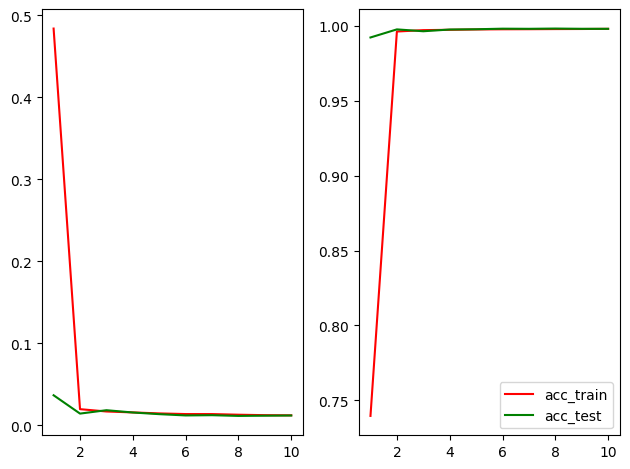

In [57]:
fig, axes = plt.subplots(1,2)

x = list(range(1,len(list_loss_train) + 1))

axes[0].plot(x, list_loss_train,color = "red", label = "loss_train")


axes[0].plot(x, list_loss_test,color = "green", label = "loss_test")

axes[1].plot(x, list_acc_train,color = "red", label = "acc_train")

axes[1].plot(x, list_acc_test,color = "green", label = "acc_test")

plt.legend()
fig.tight_layout()

